In [4]:
#Basic import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# What factors made people more likely to survive on the Titanic?

In [19]:
#Import the titanic dataset and print length of dataframe
df = pd.read_csv('titanic-data.csv')
print "There are %i rows in the dataframe." % len(df)

There are 891 rows in the dataframe


In [13]:
#Output the top 20 rows of the dataframe for examination
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
#Show the data types for all columns in the dataframe
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
#Show basic dataframe statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
# sex = pd.get_dummies(df['Sex']).rename(columns=lambda x: str(x))
# sex.corrwith(df['Survived'])
pd.concat([df['Survived'], pd.get_dummies(df['Sex']).rename(columns=lambda x: str(x))], axis=1).corr()

,Survived,female,male
Survived,1.000000,0.543351,-0.543351
female,0.543351,1.000000,-1.000000
male,-0.543351,-1.000000,1.000000


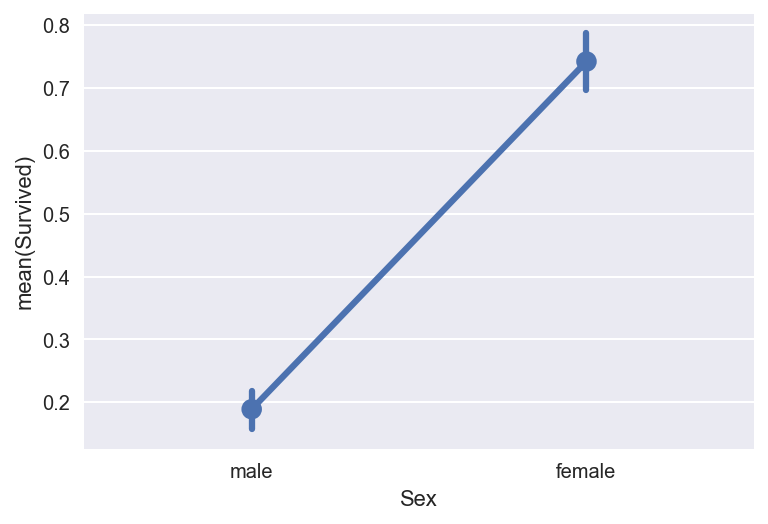

In [43]:
sns.pointplot(x="Sex", y="Survived", data=df);

In [28]:
pd.concat([df['Survived'], pd.get_dummies(df['Embarked']).rename(columns=lambda x: str(x))], axis=1).corr()

,Survived,C,Q,S
Survived,1.00000,0.168240,0.003650,-0.155660
C,0.16824,1.000000,-0.148258,-0.778359
Q,0.00365,-0.148258,1.000000,-0.496624
S,-0.15566,-0.778359,-0.496624,1.000000


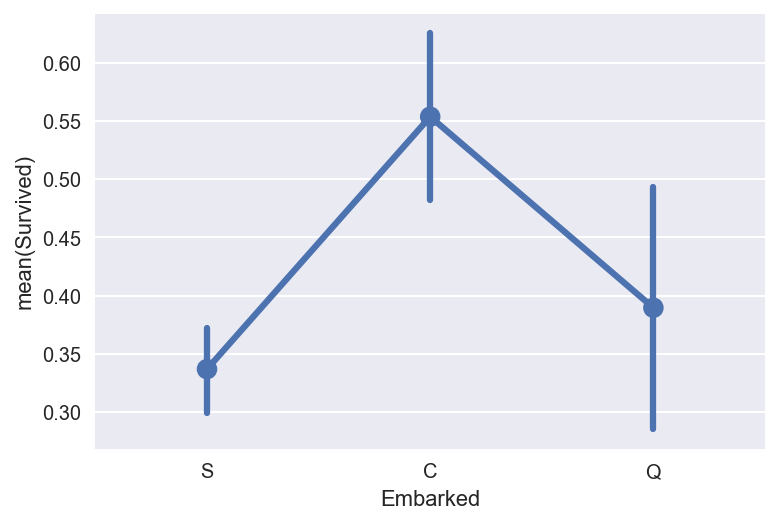

In [41]:
sns.pointplot(x="Embarked", y="Survived", data=df);

In [29]:
pd.concat([df['Survived'], pd.get_dummies(df['Pclass']).rename(columns=lambda x: str(x))], axis=1).corr()

,Survived,1,2,3
Survived,1.000000,0.285904,0.093349,-0.322308
1,0.285904,1.000000,-0.288585,-0.626738
2,0.093349,-0.288585,1.000000,-0.565210
3,-0.322308,-0.626738,-0.565210,1.000000


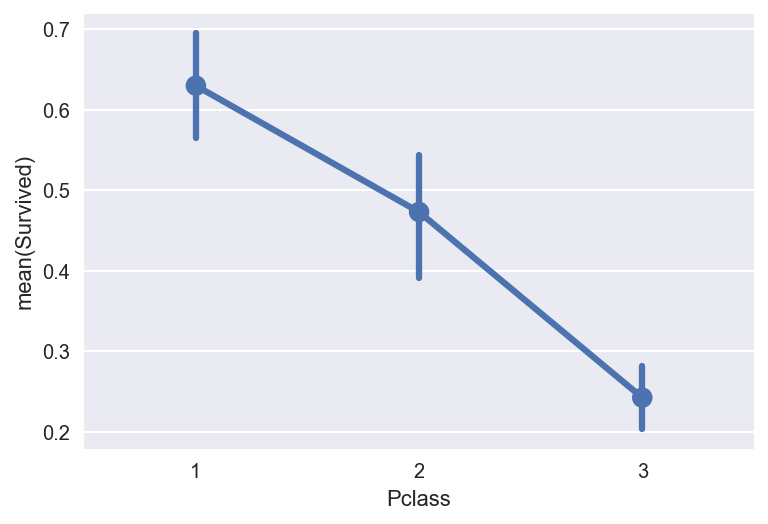

In [44]:
sns.pointplot(x="Pclass", y="Survived", data=df);

In [54]:
pd.concat([df['Survived'], pd.get_dummies(df['SibSp']).rename(columns=lambda x: str(x))], axis=1).corr()

,Survived,0,1,2,3,4,5,8
Survived,1.000000,-0.115867,0.173076,0.029796,-0.037215,-0.064123,-0.059292,-0.070234
0,-0.115867,1.000000,-0.811408,-0.264017,-0.198205,-0.210469,-0.110110,-0.130431
1,0.173076,-0.811408,1.000000,-0.099714,-0.074858,-0.079490,-0.041586,-0.049261
2,0.029796,-0.264017,-0.099714,1.000000,-0.024357,-0.025864,-0.013531,-0.016029
3,-0.037215,-0.198205,-0.074858,-0.024357,1.000000,-0.019417,-0.010158,-0.012033
4,-0.064123,-0.210469,-0.079490,-0.025864,-0.019417,1.000000,-0.010787,-0.012778
5,-0.059292,-0.110110,-0.041586,-0.013531,-0.010158,-0.010787,1.000000,-0.006685
8,-0.070234,-0.130431,-0.049261,-0.016029,-0.012033,-0.012778,-0.006685,1.000000


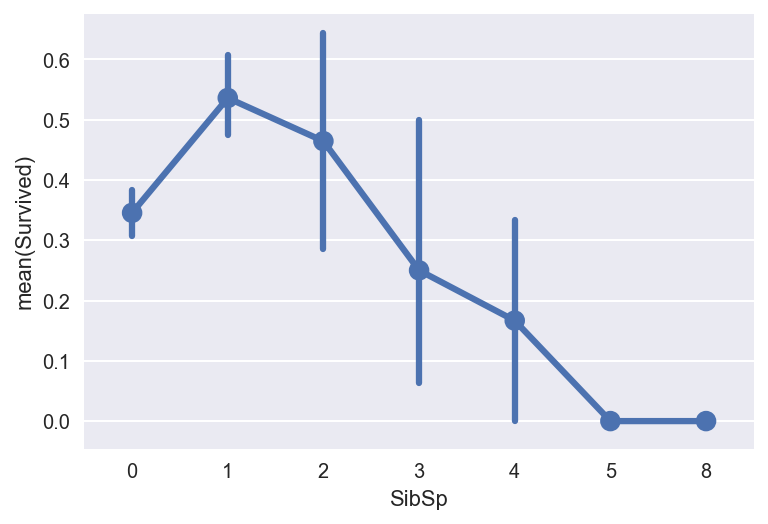

In [55]:
sns.pointplot(x="SibSp", y="Survived", data=df);

In [57]:
pd.concat([df['Survived'], pd.get_dummies(df['Parch']).rename(columns=lambda x: str(x))], axis=1).corr()

,Survived,0,1,2,3,4,5,6
Survived,1.000000,-0.147408,0.134174,0.075020,0.033391,-0.053002,-0.028398,-0.026456
0,-0.147408,1.000000,-0.697070,-0.560350,-0.134027,-0.119810,-0.134027,-0.059804
1,0.134174,-0.697070,1.000000,-0.122712,-0.029351,-0.026237,-0.029351,-0.013097
2,0.075020,-0.560350,-0.122712,1.000000,-0.023594,-0.021091,-0.023594,-0.010528
3,0.033391,-0.134027,-0.029351,-0.023594,1.000000,-0.005045,-0.005643,-0.002518
4,-0.053002,-0.119810,-0.026237,-0.021091,-0.005045,1.000000,-0.005045,-0.002251
5,-0.028398,-0.134027,-0.029351,-0.023594,-0.005643,-0.005045,1.000000,-0.002518
6,-0.026456,-0.059804,-0.013097,-0.010528,-0.002518,-0.002251,-0.002518,1.000000


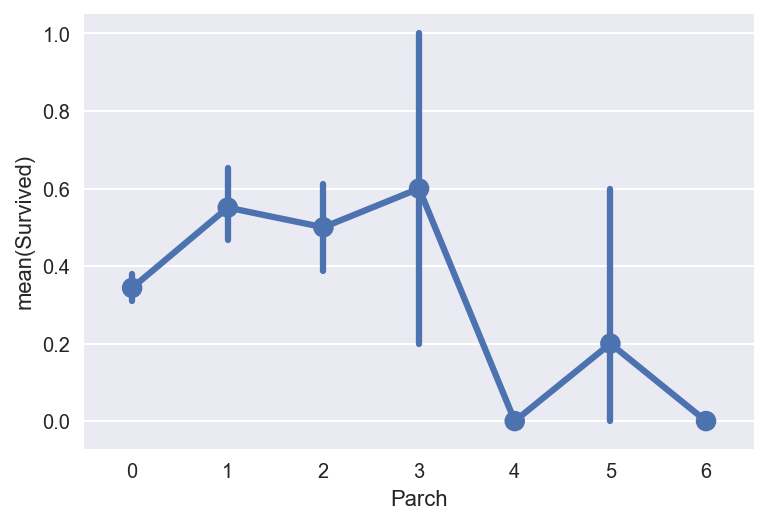

In [56]:
sns.pointplot(x="Parch", y="Survived", data=df);

In [58]:
#Calculate the correlations
df[['Survived', 'Age', 'Fare']].corr()

,Survived,Age,Fare
Survived,1.000000,-0.077221,0.257307
Age,-0.077221,1.000000,0.096067
Fare,0.257307,0.096067,1.000000


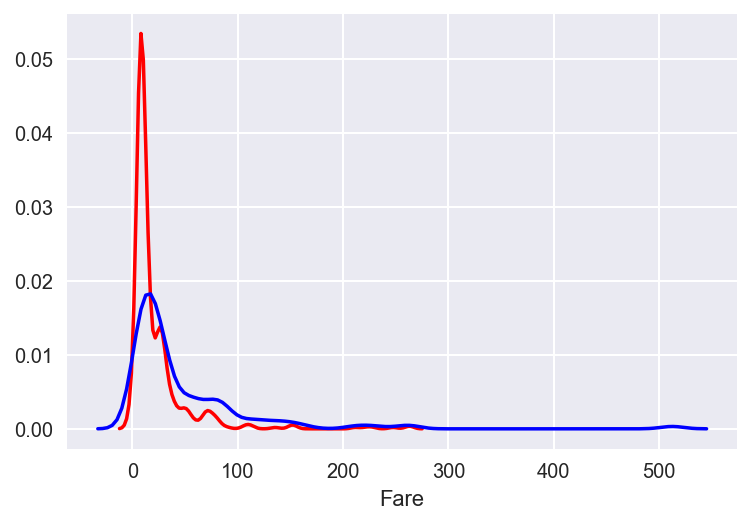

In [61]:
sns.distplot(df[(df['Survived'] == 0) & (df['Fare'].notnull())]['Fare'], hist=False, color="r")
sns.distplot(df[(df['Survived'] == 1) & (df['Fare'].notnull())]['Fare'], hist=False, color="b")

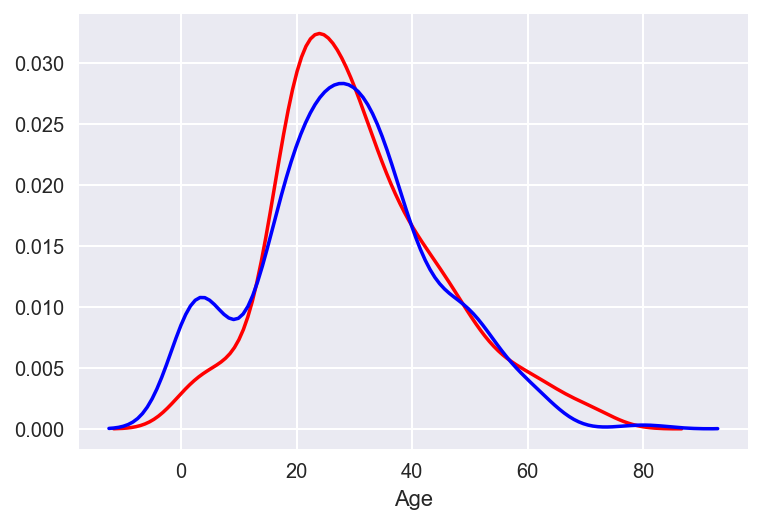

In [62]:
sns.distplot(df[(df['Survived'] == 0) & (df['Age'].notnull())]['Age'], hist=False, color="r")
sns.distplot(df[(df['Survived'] == 1) & (df['Age'].notnull())]['Age'], hist=False, color="b")